1. understand the shape of the data
2. data cleaning
3. data exploration
4. feature engineering
5. data preprocessing for model
6. basic model building
7. modeling tuning
8. ensemmble model building
9. results


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
train_data = pd.read_csv("/Users/mario/OneDrive/Repositories/Github/Titanic/data/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


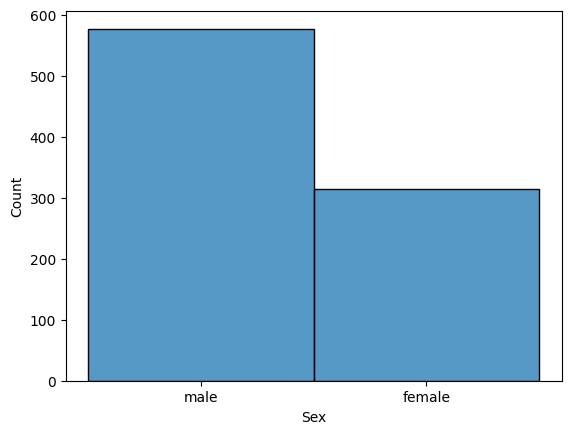

In [3]:
# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt


# 'data' and 'x' values are case sensitive
# 'data' = dataset 
# 'x' = the feature you are interested in displaying
sns.histplot(data=train_data, x="Sex")
plt.show()

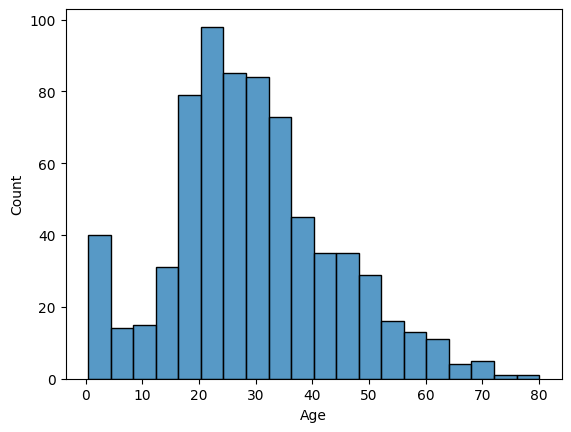

In [4]:
sns.histplot(data=train_data, x="Age")
plt.show()

In [5]:
survived = train_data[train_data["Survived"] == 1]
died = train_data[train_data["Survived"] == 0]

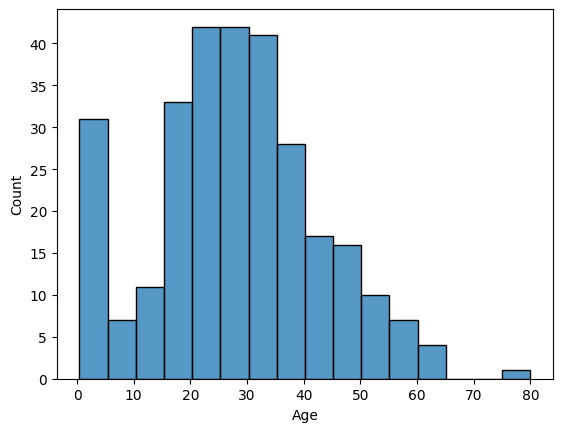

In [6]:
sns.histplot(data=survived, x="Age")
plt.show()

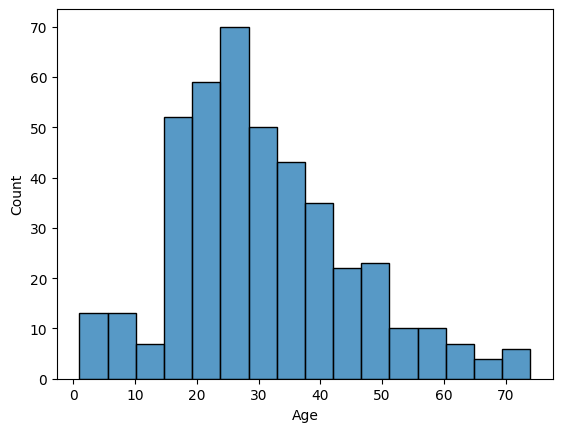

In [7]:
sns.histplot(data=died, x="Age")
plt.show()

Children were most likely to survive the Tatanic disaster.

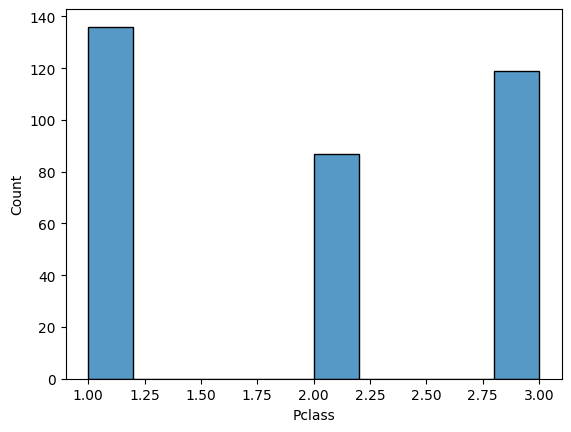

In [8]:
# class ticket 
# 1 = 1st, 2 = 2nd, 3 = 3rd
sns.histplot(data=survived, x="Pclass")
plt.show()

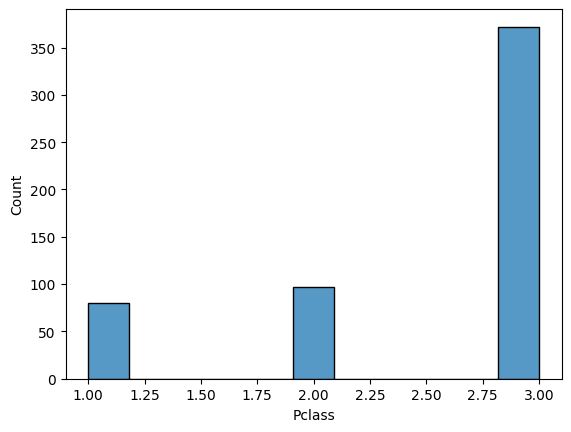

In [9]:
# class ticket 
# 1 = 1st, 2 = 2nd, 3 = 3rd
sns.histplot(data=died, x="Pclass")
plt.show()

There is a large disparity between class deaths. 3rd class, the poorest class of passengers, dispraportionately died the most on the Titanic

In [10]:
import re

In [11]:
# extract the title and reduce them all to Mrs, Miss, Mr and Master.
def get_title(txt):
    # find items that have ',' followed by some text and ending in '.'
    x = re.search(r"\,.*\.", txt)
    if x:
        value = x.group()
        # find text after ',' and ' '
        x2 = re.search(r"(?<=\,\s).*\.", value)
        value2 = x2.group()
        # find text till the first '.'
        x3 = re.search(r"\b\w+\b(?=\.)", value2)
        return x3.group()

train_data['Title']=train_data['Name'].map(lambda x: get_title(x))

In [12]:
# add empty column to dataframe
train_data['ReplacedTitles'] = np.nan

def replace_titles(x):
    title = x['Title']
    if title in ['Don', 'Major', 'Capt', 'Jonkheer', 'Rev', 'Col']:
        return 'Mr'
    elif title in ['Countess', 'Mme']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    elif title =='Dr':
        if x['Sex']=='Male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title

train_data['ReplacedTitles']=train_data.apply(replace_titles, axis=1)

In [13]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,ReplacedTitles
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Mr


In [14]:
print(train_data['Title'].unique())
print(train_data['ReplacedTitles'].unique())

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'Countess' 'Jonkheer']
['Mr' 'Mrs' 'Miss' 'Master' 'Lady' 'Sir']


In [15]:
txt = "E D10 D12"
x = re.search(r"[A-Z]{1}[0-9]{1,3}", txt)
print(x.group())

D10


In [16]:
# add empty column to dataframe
train_data['Deck'] = np.nan

def get_deck(txt):
    if type(txt) == str:
        # print("not a nan")
        # print(txt)
        x1 = re.search(r"[A-Z]{1}[0-9]{1,3}", txt)
        if x1 != None:
            value = x1.group()
            x2 = re.search(r"[A-Z]{1}", txt)
            return x2.group()
    return "unknown"

train_data['Deck']=train_data['Cabin'].map(lambda x: get_deck(x))
    

In [17]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,ReplacedTitles,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Mr,unknown
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Mrs,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Miss,unknown
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Mrs,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Mr,unknown


In [18]:
print(train_data['Deck'].unique())

['unknown' 'C' 'E' 'G' 'D' 'A' 'B' 'F']


In [19]:
# add family size column to dataframe
train_data['FamilySize'] = train_data['SibSp']+train_data['Parch']

In [20]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,ReplacedTitles,Deck,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Mr,unknown,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Mrs,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Miss,unknown,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Mrs,C,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Mr,unknown,0


In [21]:
print(train_data['FamilySize'].unique())

[ 1  0  4  2  6  5  3  7 10]


In [22]:
train_data['FarePerPerson']=train_data['Fare']/(train_data['FamilySize']+1)

In [23]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,ReplacedTitles,Deck,FamilySize,FarePerPerson
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Mr,unknown,1,3.62500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Mrs,C,1,35.64165
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Miss,unknown,0,7.92500
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Mrs,C,1,26.55000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Mr,unknown,0,8.05000
